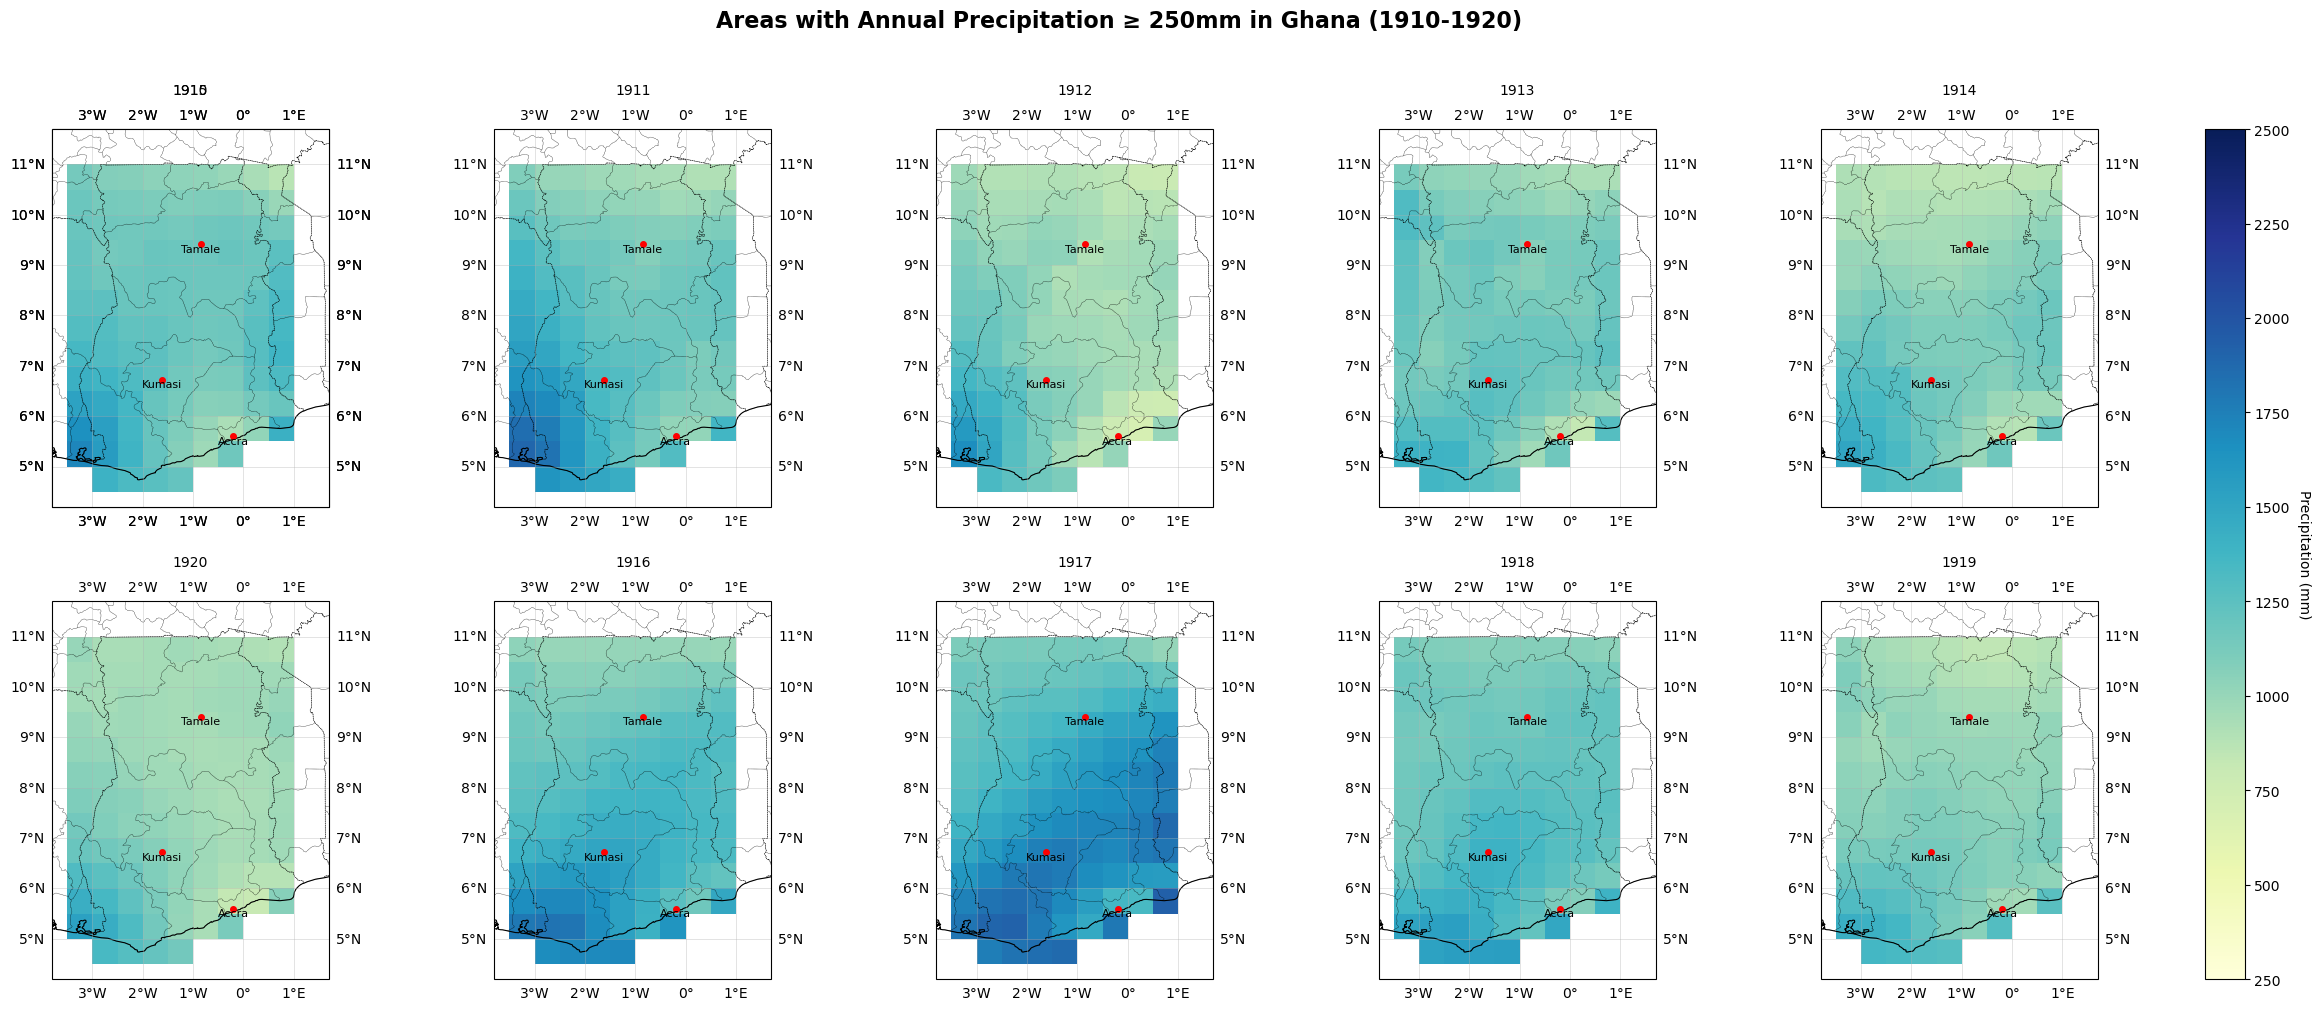

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the dataset
file_path = 'Africa_cru_data.nc'
data = xr.open_dataset(file_path)

# Select precipitation variable (adjust if needed)
precip = data['pre']  # Change if your variable has different name

# Ghana's boundaries (lon_min, lon_max, lat_min, lat_max)
gh_coordinates = {'lon': (-3.3, 1.2),'lat': (4.7, 11.2)}

# Create figure with adjusted spacing
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Areas with Annual Precipitation ≥ 250mm in Ghana (1910-1920)', y=1.02, fontsize=16, weight='bold')
 
# Create gridspec with 2 rows, 6 columns (last spot for colorbar)
gs = fig.add_gridspec(2, 6, hspace=0.25, wspace=0.15,width_ratios=[1,1,1,1,1,0.1])

# Loop through years 1910-1920
for i, year in enumerate(range(1910, 1921)):
    ax = fig.add_subplot(gs[i//6, i%5], projection=ccrs.PlateCarree())  # Note i%5 for 5 columns
    
    # Select and process data
    precip_year = precip.sel(time=str(year))
    precip_ghana = precip_year.sel(lon=slice(gh_coordinates['lon'][0], gh_coordinates['lon'][1]),lat=slice(gh_coordinates['lat'][0], gh_coordinates['lat'][1]))
    annual_precip = precip_ghana.sum(dim='time')
    masked_precip = annual_precip.where(annual_precip >= 250)
    
    # Create plot
    img = masked_precip.plot(ax=ax, add_colorbar=False,cmap='YlGnBu', vmin=250, vmax=2500)
    
    # Set map extent
    buffer = 0.5  # degrees buffer around Ghana
    ax.set_extent([gh_coordinates['lon'][0]-buffer, gh_coordinates['lon'][1]+buffer,gh_coordinates['lat'][0]-buffer,gh_coordinates['lat'][1]+buffer])
    
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.3)
    
    # Mark major locations
    cities = {
        'Accra': (-0.2, 5.6),
        'Kumasi': (-1.62, 6.72),
        'Tamale': (-0.85, 9.41)
    }
    for city, (lon, lat) in cities.items():
        ax.plot(lon, lat, 'ro', markersize=4, transform=ccrs.PlateCarree())
        ax.text(lon, lat-0.15, city, transform=ccrs.PlateCarree(),
               fontsize=8, ha='center')
    
    ax.set_title(f'{year}', fontsize=10, pad=10)
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)

# Add colorbar in the last grid slot
cbar_ax = fig.add_subplot(gs[:, 5])  # Rightmost column
cbar = plt.colorbar(img, cax=cbar_ax, orientation='vertical')
cbar.set_label('Precipitation (mm)', labelpad=15, rotation=270)
cbar.set_ticks(np.arange(250, 2501, 250))

# Adjust layout without tight_layout
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)

plt.show()